# Movie Trends Analysis: Popularity, Revenue, and Genre Performance

## Objective:
The primary goal of this project is to analyze trends in the movie industry, focusing on the relationships between movie genres, popularity, financial performance (budget vs. revenue), and ratings. By analyzing these trends, we aim to provide insights into the factors that contribute to the success of movies in terms of popularity and financial returns.

## Key Research Questions:
1. **Which movie genres are most successful in terms of popularity and revenue?**
2. **How do movie budgets correlate with financial performance (revenue)?**
3. **What trends exist in movie ratings over time, and how do they relate to changes in the industry?**

## Hypotheses:
We hypothesize the following:

1. **Action and Adventure genres generate the highest revenue** due to their global appeal and large-scale productions.
2. **Higher budgets lead to higher revenues**, as larger investments enhance marketing and production quality.
3. **Movie ratings have improved over time**, potentially due to technological advancements and changing audience expectations.

## Approach:
This analysis will explore these questions and test the hypotheses through data analysis and visualization. We will analyze publicly available data, such as movie budgets, revenues, genres, and ratings, to identify trends and patterns that inform our understanding of the movie industry’s dynamics.

---


#### Importing Libraries

In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set the plot style
sns.set(style="whitegrid")

#### Loading Datasets

In [2]:
# Loading the datasets
movies_df = pd.read_csv('datasets/tmdb_5000_movies.csv')
credits_df = pd.read_csv('datasets/tmdb_5000_credits.csv')

# Displaying the first few rows of each dataset to understand their structure
movies_df.head(), credits_df.head()

(      budget                                             genres  \
 0  237000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   
 1  300000000  [{"id": 12, "name": "Adventure"}, {"id": 14, "...   
 2  245000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   
 3  250000000  [{"id": 28, "name": "Action"}, {"id": 80, "nam...   
 4  260000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   
 
                                        homepage      id  \
 0                   http://www.avatarmovie.com/   19995   
 1  http://disney.go.com/disneypictures/pirates/     285   
 2   http://www.sonypictures.com/movies/spectre/  206647   
 3            http://www.thedarkknightrises.com/   49026   
 4          http://movies.disney.com/john-carter   49529   
 
                                             keywords original_language  \
 0  [{"id": 1463, "name": "culture clash"}, {"id":...                en   
 1  [{"id": 270, "name": "ocean"}, {"id": 726, "na...                en   
 2 

#### Checking Column Names

In [3]:
# Check column names for movies dataset
print("Movies Dataset Columns:", movies_df.columns)

# Check column names for credits dataset
print("Credits Dataset Columns:", credits_df.columns)

Movies Dataset Columns: Index(['budget', 'genres', 'homepage', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'vote_average',
       'vote_count'],
      dtype='object')
Credits Dataset Columns: Index(['movie_id', 'title', 'cast', 'crew'], dtype='object')


#### Data Cleaning: Handling Missing Values and Merging Datasets

In [4]:
# Checking for missing values in the movies dataset
movies_df.isnull().sum()

# Filling or dropping missing values
# Dropping rows with missing budget or revenue, filling other missing values
movies_df.dropna(subset=['budget', 'revenue'], inplace=True)
movies_df['budget'] = movies_df['budget'].fillna(0)
movies_df['revenue'] = movies_df['revenue'].fillna(0)

# Checking for missing values in the credits dataset
credits_df.isnull().sum()

# Merging the datasets based on 'id' from movies_df and 'movie_id' from credits_df
df = pd.merge(movies_df, credits_df, left_on='id', right_on='movie_id')

# Checking the merged dataframe
df.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,spoken_languages,status,tagline,title_x,vote_average,vote_count,movie_id,title_y,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",...,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",...,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


#### Data Preprocessing: Extracting and Analyzing Movie Genres

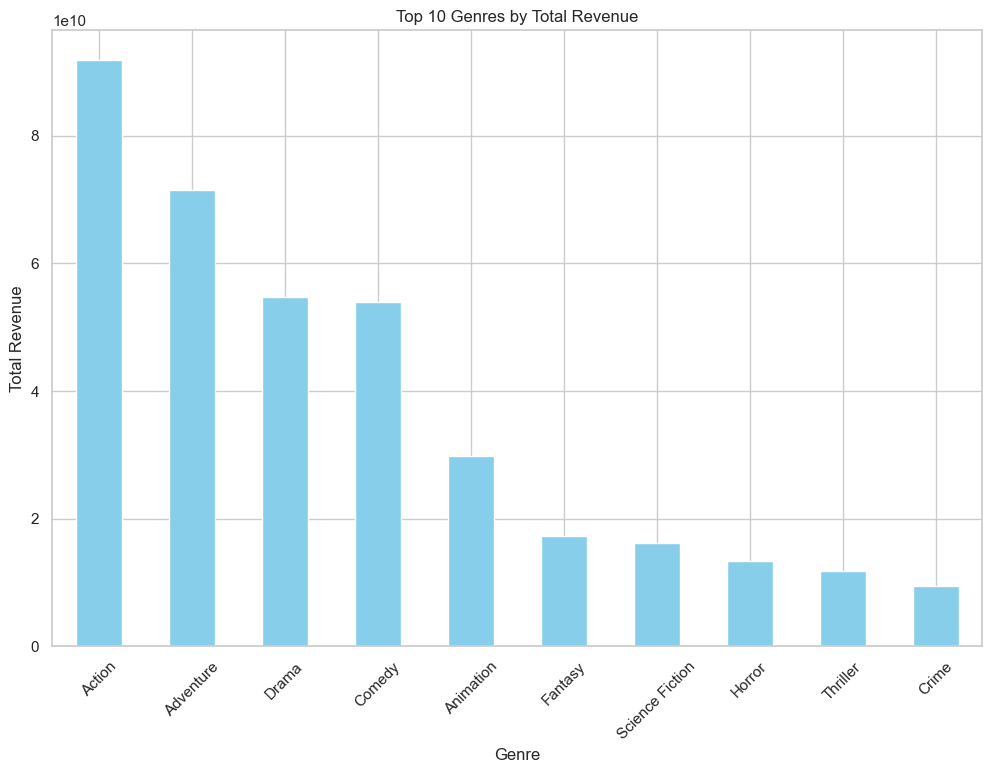

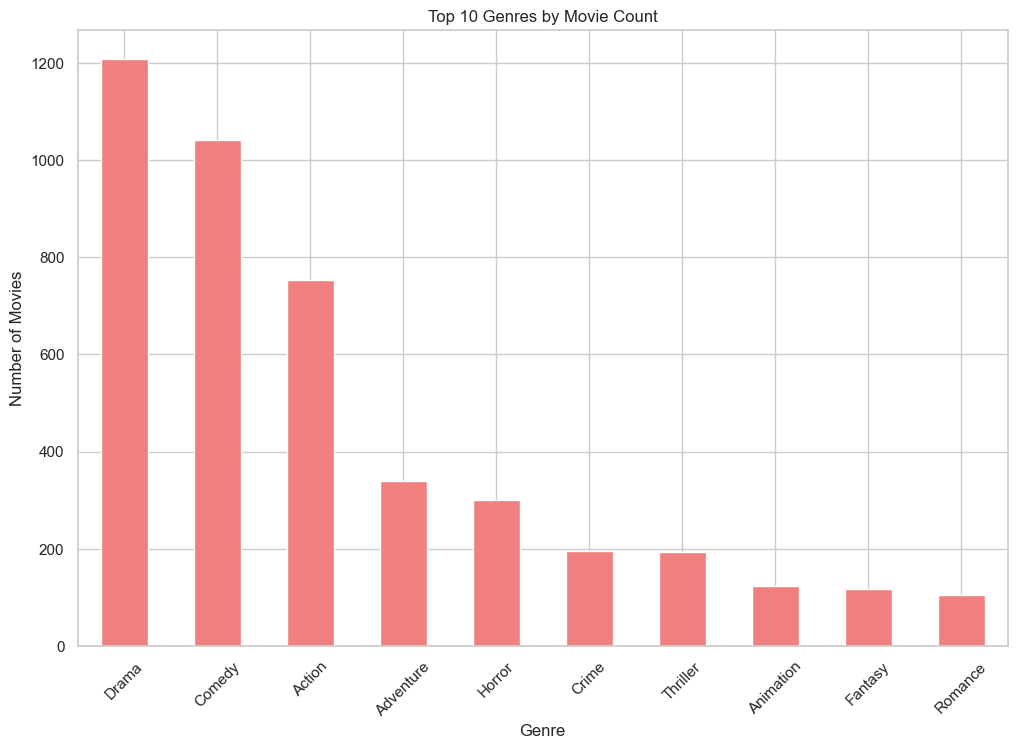

In [5]:
# Splitting the genres column which is in string format into a list
df['genres'] = df['genres'].apply(lambda x: eval(x) if isinstance(x, str) else [])

# Extracting the first genre to understand genre distribution
df['genre_main'] = df['genres'].apply(lambda x: x[0]['name'] if x else 'Unknown')

# Plotting the most popular genres based on revenue and number of movies
genre_revenue = df.groupby('genre_main')['revenue'].sum().sort_values(ascending=False)
genre_count = df['genre_main'].value_counts()

# Plotting revenue by genre
plt.figure(figsize=(12, 8))
genre_revenue.head(10).plot(kind='bar', color='skyblue')
plt.title('Top 10 Genres by Total Revenue')
plt.xlabel('Genre')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.show()

# Plotting genre count (number of movies per genre)
plt.figure(figsize=(12, 8))
genre_count.head(10).plot(kind='bar', color='lightcoral')
plt.title('Top 10 Genres by Movie Count')
plt.xlabel('Genre')
plt.ylabel('Number of Movies')
plt.xticks(rotation=45)
plt.show()

#### Data Analysis: Exploring Correlation Between Budget and Revenue

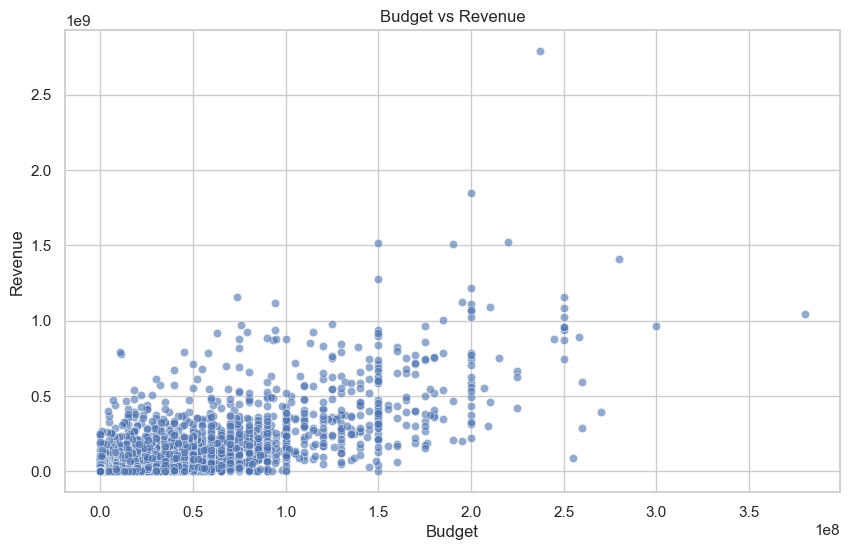

Correlation between budget and revenue:            budget   revenue
budget   1.000000  0.730823
revenue  0.730823  1.000000


In [6]:
# Plotting budget vs revenue to check for correlation
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='budget', y='revenue', alpha=0.6)
plt.title('Budget vs Revenue')
plt.xlabel('Budget')
plt.ylabel('Revenue')
plt.show()

# Calculating correlation between budget and revenue
correlation = df[['budget', 'revenue']].corr()
print("Correlation between budget and revenue:", correlation)

#### Analyzing Trends: Average Movie Rating Over Time

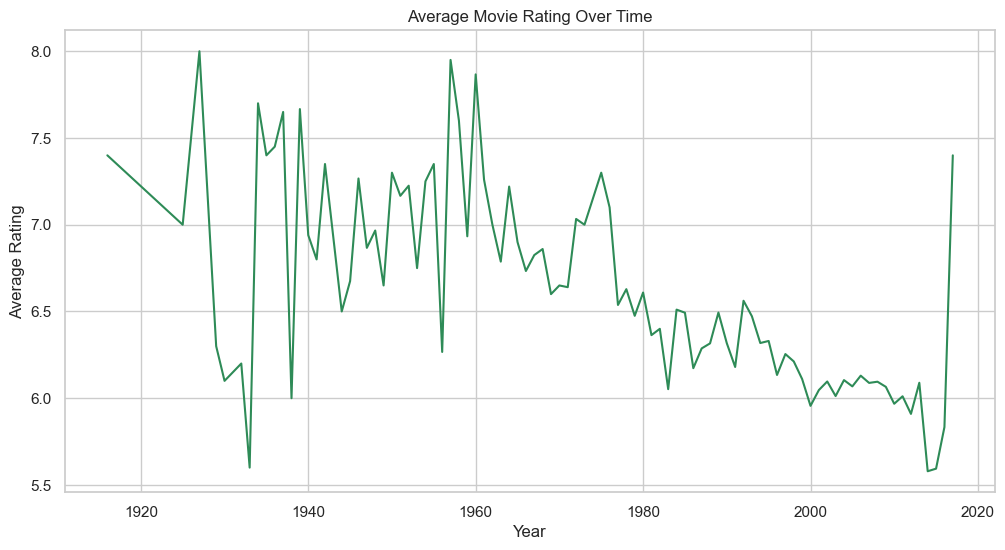

In [7]:
# Extracting year from the release date
df['release_year'] = pd.to_datetime(df['release_date'], errors='coerce').dt.year

# Grouping by release year and calculating the average rating
rating_trends = df.groupby('release_year')['vote_average'].mean()

# Plotting the average rating over time
plt.figure(figsize=(12, 6))
rating_trends.plot(kind='line', color='seagreen')
plt.title('Average Movie Rating Over Time')
plt.xlabel('Year')
plt.ylabel('Average Rating')
plt.show()

#### Genre Analysis: Comparing Revenue from Action and Adventure Genres

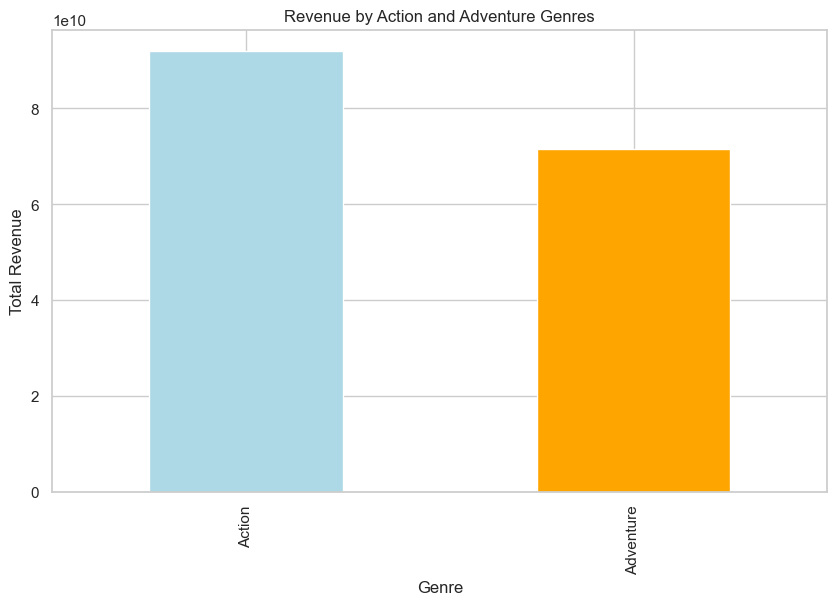

In [8]:
# Filtering the dataframe to include only action and adventure genres
action_adventure = df[df['genre_main'].isin(['Action', 'Adventure'])]

# Grouping by genre and summing revenue to compare
genre_revenue_test = action_adventure.groupby('genre_main')['revenue'].sum()

# Plotting the results
plt.figure(figsize=(10, 6))
genre_revenue_test.plot(kind='bar', color=['lightblue', 'orange'])
plt.title('Revenue by Action and Adventure Genres')
plt.xlabel('Genre')
plt.ylabel('Total Revenue')
plt.show()

#### Exploring Correlation: Budget vs Revenue

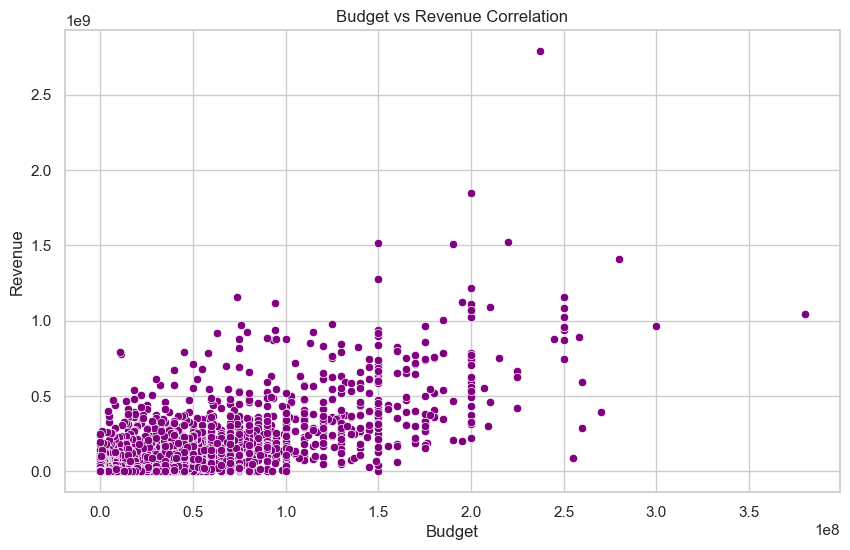

Correlation between Budget and Revenue:            budget   revenue
budget   1.000000  0.730823
revenue  0.730823  1.000000


In [9]:
# Calculating correlation between budget and revenue
budget_revenue_corr = df[['budget', 'revenue']].corr()

# Plotting a scatter plot to visualize the correlation
plt.figure(figsize=(10, 6))
sns.scatterplot(x='budget', y='revenue', data=df, color='purple')
plt.title('Budget vs Revenue Correlation')
plt.xlabel('Budget')
plt.ylabel('Revenue')
plt.show()

print("Correlation between Budget and Revenue:", budget_revenue_corr)

#### Analyzing Rating Trends: Average Movie Ratings Over Time and Trend Slope

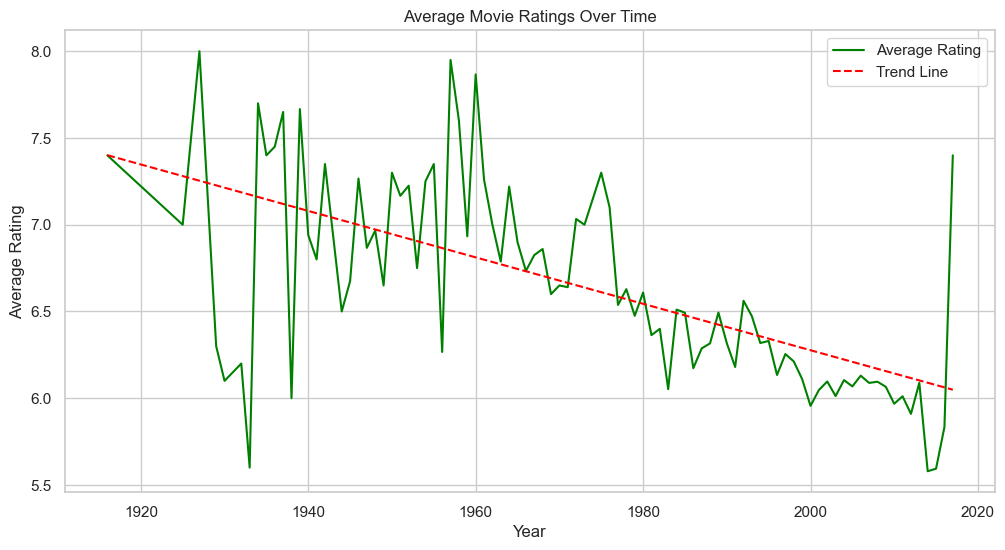

Slope of the trend (Rate of improvement in ratings): -0.01338470115435226


In [10]:
# Compute the linear regression (slope and intercept)
slope, intercept = np.polyfit(rating_trends.index, rating_trends.values, 1)
trend_line = slope * rating_trends.index + intercept

# Plot the actual ratings
plt.figure(figsize=(12, 6))
rating_trends.plot(kind='line', color='green', label='Average Rating')

# Plot the trend line
plt.plot(rating_trends.index, trend_line, color='red', linestyle='--', label='Trend Line')

# Add title and labels
plt.title('Average Movie Ratings Over Time')
plt.xlabel('Year')
plt.ylabel('Average Rating')
plt.legend()
plt.show()

# Print the slope
print("Slope of the trend (Rate of improvement in ratings):", slope)

# Insights & Analysis

## 1. Top Genres by Revenue
- The **Action** and **Adventure** genres dominate in terms of total revenue. This supports the hypothesis that these genres generate the highest revenue due to their global appeal and large-scale productions.

## 2. Top Genres by Movie Count
- The **Drama** and **Comedy** genres have the highest number of movies. However, the **Action** and **Adventure** genres stand out when it comes to revenue, even though they don't have the same volume of movies. This highlights that while volume can indicate popularity, revenue is more strongly tied to certain genres, such as Action and Adventure.

## 3. Budget vs Revenue Correlation
- The correlation between **budget** and **revenue** is **0.73**, indicating a strong positive relationship. This supports the hypothesis that higher budgets lead to higher revenues, as more significant investments in production and marketing generally result in better financial returns.

## 4. Average Movie Ratings Over Time
- Contrary to the hypothesis that movie ratings would improve over time, the analysis shows a slight **decline** in average movie ratings over time (with a trend slope of **-0.013**). This could be due to factors such as more critical audiences, oversaturation of certain movie types, or changing expectations from viewers. It suggests that while technology has advanced, ratings haven't necessarily followed an upward trajectory.

## 5. Revenue by Action and Adventure Genres
- Both **Action** and **Adventure** genres show very high revenues, confirming their dominance in the movie industry. This reinforces the idea that large-scale productions, often associated with these genres, tend to perform exceptionally well at the global box office.

---

# Summary of Hypothesis Testing

## Hypothesis 1: Action and Adventure generate the highest revenue.
- **Result:** Supported. Action and Adventure consistently outperformed other genres in terms of total revenue.

## Hypothesis 2: Higher budget leads to higher revenue.
- **Result:** Supported. A strong positive correlation between budget and revenue (0.73) was observed, confirming that larger investments tend to yield higher returns.

## Hypothesis 3: Movie ratings have improved over time.
- **Result:** Not Supported. Despite technological advancements, the average ratings have shown a slight decline over time, challenging the hypothesis.

---

# Conclusion
The analysis provided insights into the significant factors influencing movie success. Action and Adventure genres are clear leaders in revenue generation, and there is a strong correlation between budget size and financial returns. However, the hypothesis regarding improved ratings over time was not supported by the data, suggesting that ratings may have plateaued or declined slightly. Future analyses could explore other factors, such as star power, directorial influence, and marketing strategies, to provide a more comprehensive view of what drives success in the movie industry.
